<a href="https://colab.research.google.com/github/atiyehghm/DeepLearningSelfStudy/blob/main/Keras_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake regression example(Basics)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step1 - Reading data

In [ ]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


feature 2 has a very good correlation with the target variable

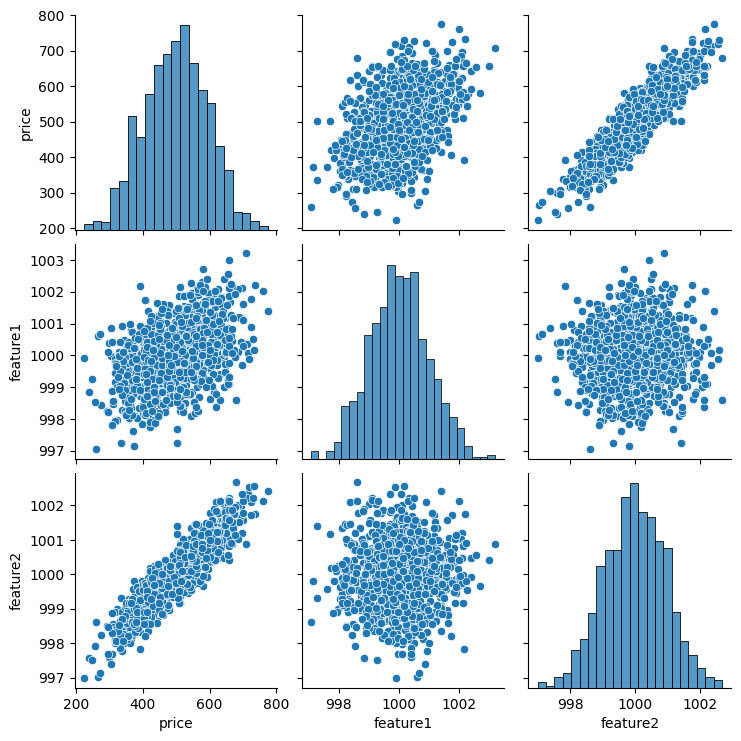

In [ ]:
sns.pairplot(df)

## Step2 - Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

## keras gets the numpy arrays instead of pandas data frames
X = df[['feature1','feature2']].values
y = df['price'].values

## train test split randomly chooses the rows so if you want to get the same split each time set a random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

## Step3 - Normalize or scale your data

to prevent any issues when training your network. issues like vanishing or exploding gradients.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

## you dont need to scale your label beacuse it isnt feed into your nn. you only have to scale your features.

#help(MinMaxScaler)

scaler = MinMaxScaler()
scaler.fit(X_train) ## calculates the parameters it gonna need(min, max, std)
## we only fit it to train set beacuse we dont want any leakage

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


X_train.min(), X_train.max()

(0.0, 1.0)

## Step 4 - Creating models

**Choosing an optimizer and loss**
Keep in mind what kind of problem you are trying to solve:

 For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

 For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

 For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#there exists two types of defining a model in keras:

## 1 is to give the layers as a list to Sequential model
# model = Sequential([Dense(4, activation='relu'),
#                     Dense(2, activation='relu'),
#                     Dense(1)])

## 2 is to add layers --> this is recommended, more comfortable for commneting out the layers and editing
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=200, verbose=1)

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 254106.5469
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255498.9688 
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 250840.2188 
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254922.9844 
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252887.9219 
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253274.2031 
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255948.6094 
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259231.9531 
Epoch 9/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254530.7812 
Epoch 10/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253743.1406 
Epoch 11/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256233.1250 
Epoch 12/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253551.7031 
Epoch 13/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 252776.9219  
Epoch 14/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

<Axes: >

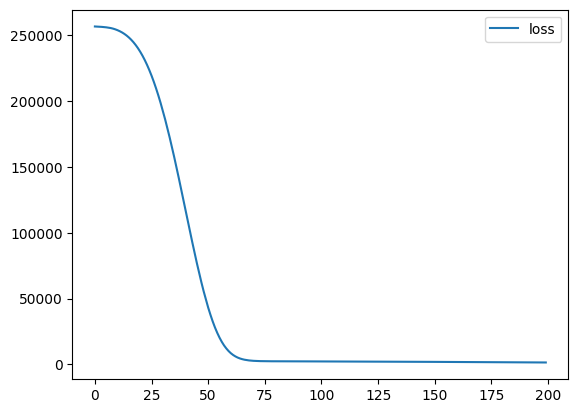

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
print(model.evaluate(X_train, y_train, verbose=0))
model.evaluate(X_test, y_test, verbose=0)

1394.594482421875


1376.2332763671875

In [ ]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
test_pred = pd.Series(y_pred.reshape(300,))
pred_df = pd.DataFrame(y_test, columns=['true y'])

pred_df = pd.concat([pred_df, test_pred], axis=1)
pred_df.columns = ['true_y', 'y_pred']

pred_df.head()

,true_y,y_pred
0,402.296319,443.193817
1,624.156198,581.213440
2,582.455066,566.775635
3,578.588606,536.380493
4,371.224104,395.047424


<Axes: xlabel='true_y', ylabel='y_pred'>

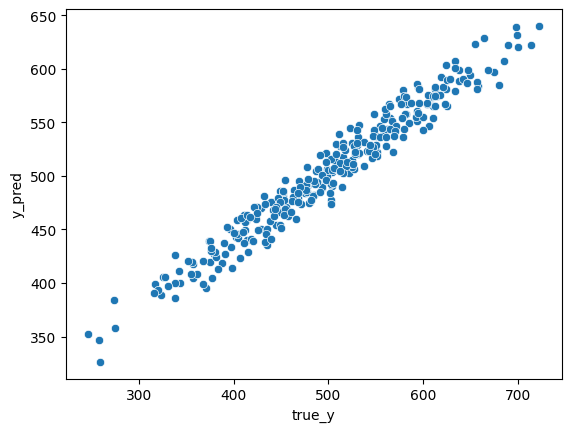

In [ ]:
sns.scatterplot(x='true_y',y='y_pred', data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mean_absolute_error(pred_df['true_y'], pred_df['y_pred'])

29.33445026545304

چجوری بفهمیم آیا پیش بینی خوبی داشتیم یا نه؟

این کاملا بستگی به دیتا داره مثلا الان ما تقریبا ۳۰ دلار خطا داریم و اگر دیتای ما در اردر ۱۰۰ دلار بود اونوقت ۳۰ دلار خیلی بزرگه ولی اگر در اردر ۱۰۰۰۰ دلاره ۳۰ دلار قابل چشم پوشیه


In [ ]:
r2_score(pred_df['true_y'], pred_df['y_pred'])

0.8434681142052431

In [ ]:
np.sqrt(mean_squared_error(pred_df['true_y'], pred_df['y_pred']))

37.09761847550682

In [ ]:
new_gem = [[998, 1000]]

new_gem = scaler.transform(new_gem)
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[430.28186]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

model.save("my_model.keras")

later_model = load_model("my_model.keras")
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


array([[430.28186]], dtype=float32)

# Real-world Example(Regression)

## EDA

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
## checkin for any missing data

# df.isnull().sum()

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


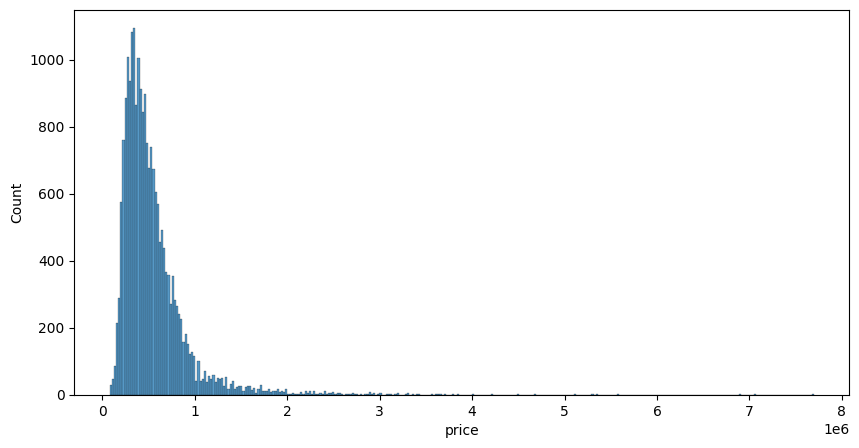

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'])
plt.show()

In [ ]:
## plotting a discrete feature
sns.countplot(df['bedrooms'])
plt.show()

KeyboardInterrupt: 

In [ ]:
df.drop(['date'], axis=1).corr()['price'].sort_values()

,price
zipcode,-0.053402
id,-0.016772
long,0.022036
condition,0.036056
yr_built,0.053953
sqft_lot15,0.082845
sqft_lot,0.089876
yr_renovated,0.126424
floors,0.256804
waterfront,0.266398


<Axes: xlabel='price', ylabel='sqft_living'>

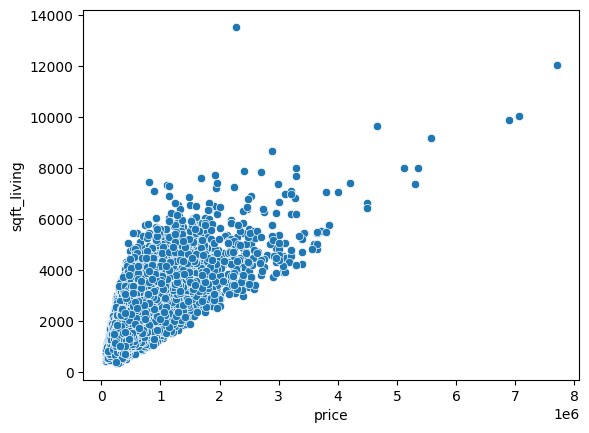

In [ ]:
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

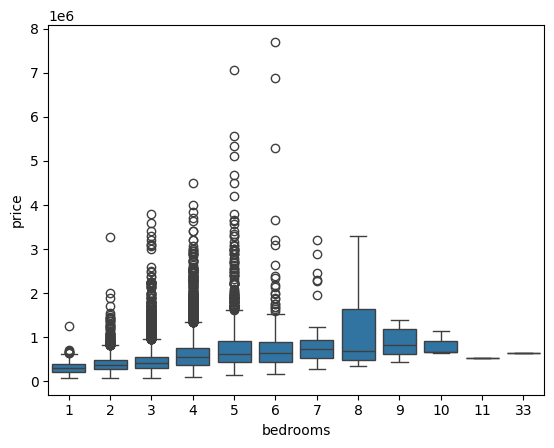

In [ ]:
sns.boxplot(x='bedrooms', y='price', data=df)

<Axes: xlabel='price', ylabel='long'>

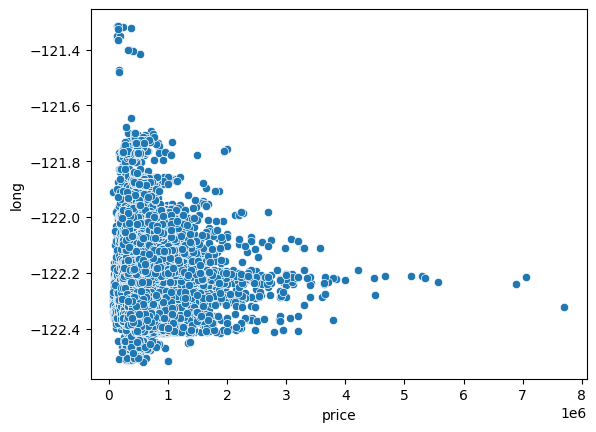

In [ ]:
sns.scatterplot(x='price', y='long', data=df)

<Axes: xlabel='price', ylabel='lat'>

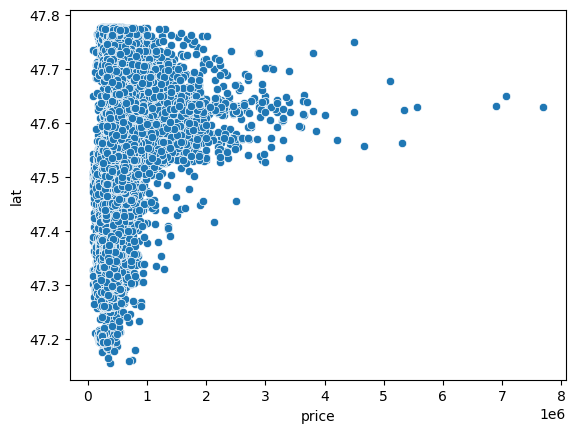

In [ ]:
sns.scatterplot(x='price', y='lat', data=df)

چیزی که از این دو پلات میفهمیم اینه که یه ناحیه ایی وجود داره که قیمت اونجا خیلی بالاست.

<Axes: xlabel='long', ylabel='lat'>

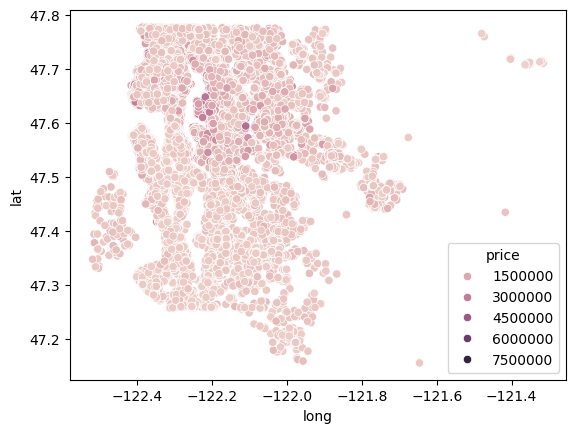

In [ ]:
 sns.scatterplot(x='long', y='lat', data=df, hue='price')

<Axes: xlabel='long', ylabel='lat'>

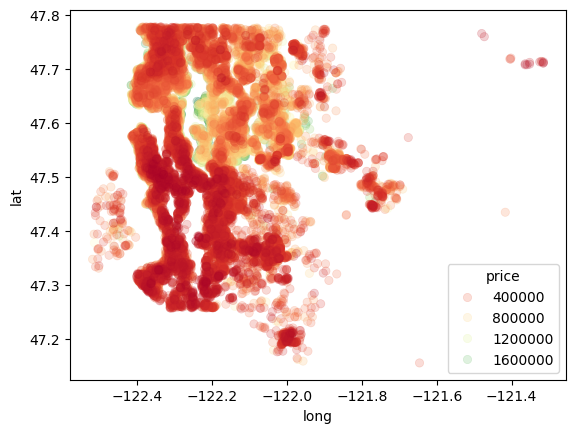

In [ ]:
non_top_1_percent = df.sort_values('price', ascending=False).iloc[216:]

sns.scatterplot(x='long', y='lat', data=non_top_1_percent, hue='price'
, edgecolor=None, alpha=0.2, palette='RdYlGn')

<Axes: xlabel='waterfront', ylabel='price'>

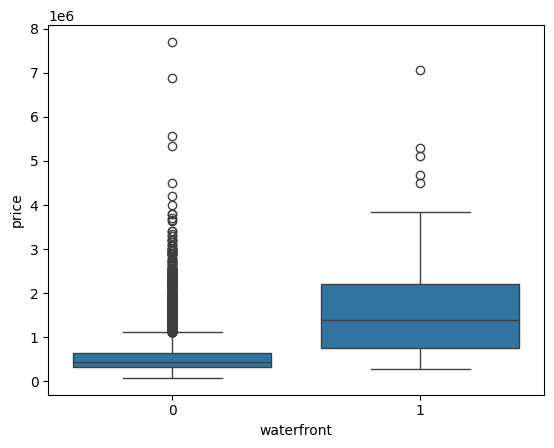

In [ ]:
sns.boxplot(x='waterfront', y='price', data=df)

## Feature Engineering

In [ ]:
df = df.drop(['id'], axis=1)
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

<Axes: xlabel='year', ylabel='price'>

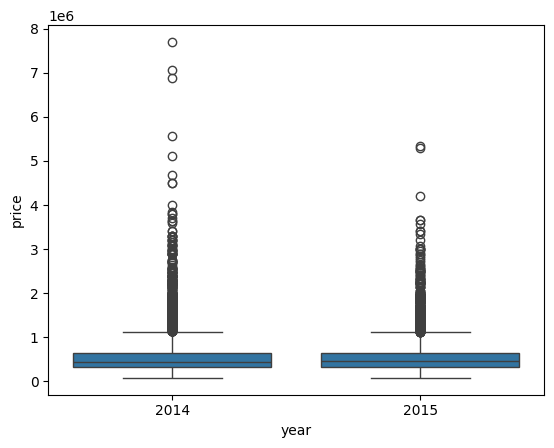

In [ ]:
sns.boxplot(x='year', y='price', data=df)

In [ ]:
df.groupby('year').mean()['price']

,price
year,
2014,539350.911777
2015,542279.005878


In [ ]:
df.drop(['date'], axis=1, inplace=True)

In [ ]:
df.drop(['zipcode'], axis=1, inplace=True)

## training

In [ ]:
X = df.drop('price', axis=1).values
y = df['price'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))


model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=128, epochs=400, verbose=1)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 420439851008.0000 - val_loss: 418922430464.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 432569548800.0000 - val_loss: 413801938944.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 427498438656.0000 - val_loss: 362351951872.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 339815989248.0000 - val_loss: 201305980928.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172359778304.0000 - val_loss: 98601476096.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106503708672.0000 - val_loss: 94548819968.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96911450112.0000 - val_loss: 92869058560.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98280906752.0000 - val_loss: 91148410880.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100253401088.0000 - val_loss: 89307357184.0000
Epoch 10/400
119/119 ━━━━━

In [ ]:
loss = pd.DataFrame(model.history.history)

<Axes: >

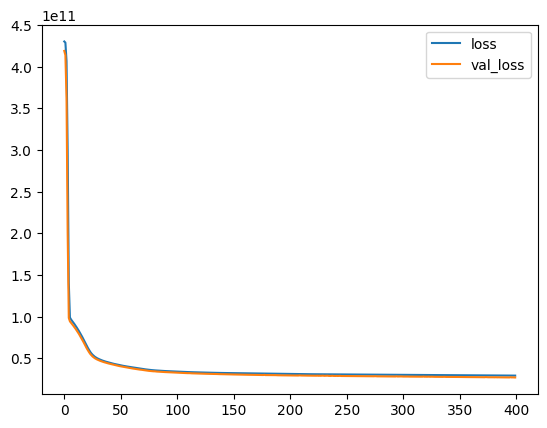

In [ ]:
loss.plot()

# Real-wolrd Example(Classification)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='mean radius'>

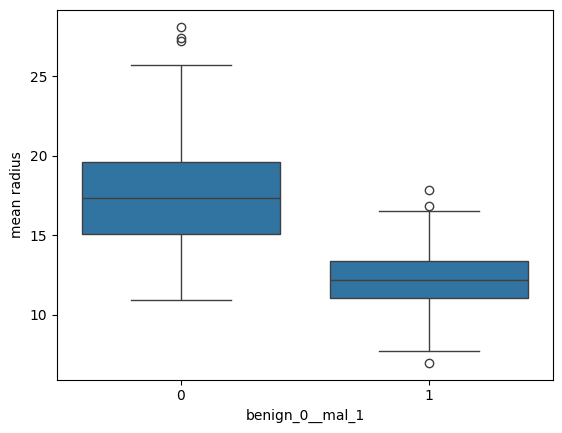

In [5]:
sns.boxplot(x='benign_0__mal_1', y='mean radius', data=df)

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

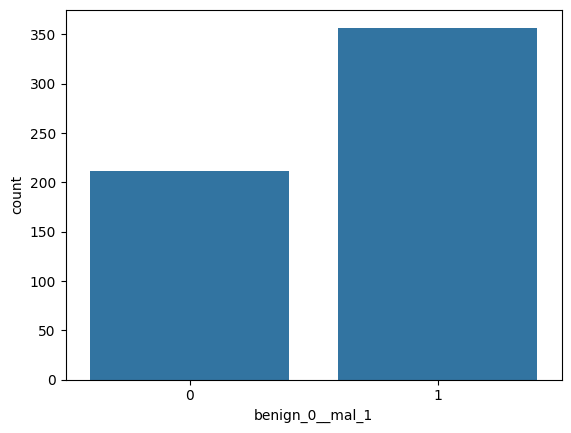

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

<Axes: >

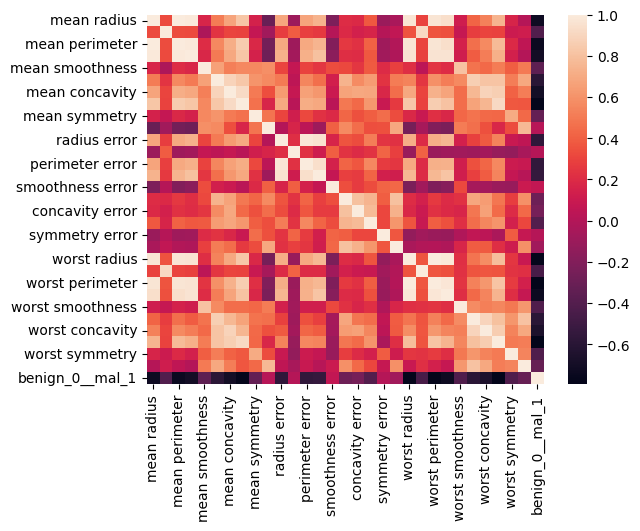

In [7]:
sns.heatmap(df.corr())

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['benign_0__mal_1'], axis=1).values
y = df['benign_0__mal_1']


X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [11]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7016 - val_loss: 0.6819
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6795 - val_loss: 0.6637
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6493 - val_loss: 0.6333
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6107 - val_loss: 0.5871
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5702 - val_loss: 0.5403
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5224 - val_loss: 0.4946
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4727 - val_loss: 0.4511
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4452 - val_loss: 0.4052
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3901 - val_loss: 0.3563
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3724 - val_loss: 0.3176
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3280 - val_loss: 0.2833
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

<Axes: >

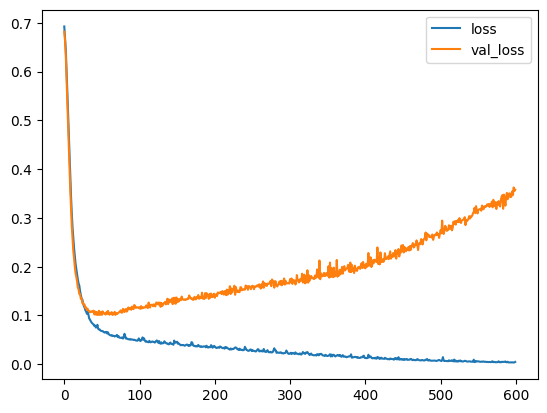

In [12]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [13]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [24]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2652 - val_loss: 0.1613
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2361 - val_loss: 0.1536
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2485 - val_loss: 0.1467
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2207 - val_loss: 0.1406
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2225 - val_loss: 0.1403
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2671 - val_loss: 0.1528
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2615 - val_loss: 0.1338
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2045 - val_loss: 0.1317
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1889 - val_loss: 0.1265
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2013 - val_loss: 0.1461
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2295 - val_loss: 0.1237
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

<Axes: >

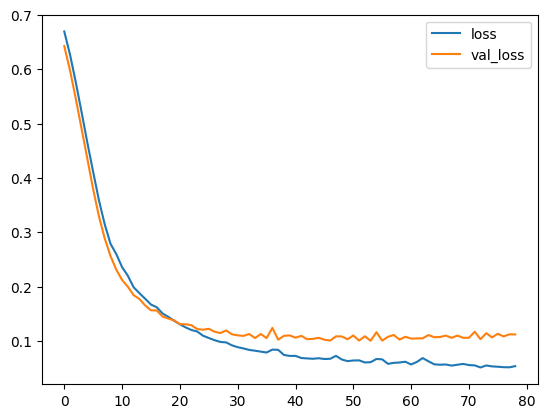

In [17]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [25]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [26]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.6905 - val_loss: 0.6743
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6887 - val_loss: 0.6601
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6616 - val_loss: 0.6466
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6490 - val_loss: 0.6313
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6379 - val_loss: 0.6122
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6332 - val_loss: 0.5919
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5980 - val_loss: 0.5686
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5916 - val_loss: 0.5432
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5698 - val_loss: 0.5183
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5781 - val_loss: 0.4961
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5434 - val_loss: 0.4753
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

<Axes: >

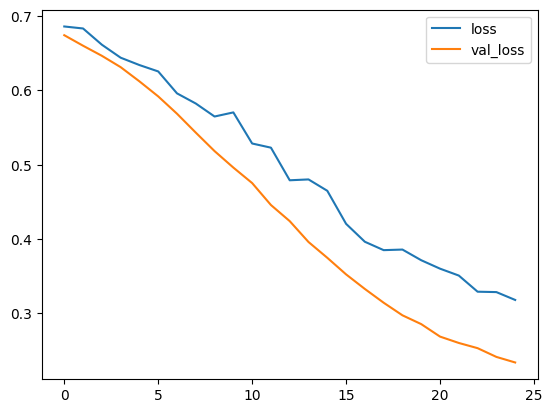

In [27]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.92      0.98      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [31]:
print(confusion_matrix(y_test, y_pred))

[[48  7]
 [ 2 86]]
